#Project name: "Quantum Simulation of Two-Qubit Hamiltonian Dynamics Using the Jordan-Wigner Transformation"


Contributor: Rajeev singh sisodiya

# Project Overview:
This project focuses on simulating the dynamics of a two-qubit quantum system using QuTiP, a quantum computing library in Python. The core objective is to implement and explore a simplified quantum simulation framework that encodes a Hamiltonian using the Jordan-Wigner transformation, a method commonly used in quantum chemistry to map fermionic systems to qubits.

The project begins by defining a quantum circuit that simulates key components of the Hamiltonian, such as one-body (kinetic energy) and two-body (Coulomb interaction) terms. The circuit is constructed using a combination of quantum gates, including Hadamard, CNOT, RX (rotation around the X-axis), and CRZ (controlled-RZ rotation) gates.

After constructing the quantum circuit, the project simulates the time evolution of an initial quantum state (all qubits initialized to the
∣
0
⟩
∣0⟩ state). The final step involves measuring the expectation value of the
𝑍
0
𝑍
1
Z
0
​
 Z
1
​
  operator, which provides insights into the correlation between the qubits after the evolution governed by the Hamiltonian.

This simulation serves as a fundamental example of how quantum circuits can model physical systems and lays the groundwork for more complex quantum simulations in quantum chemistry and materials science.


Let's create a basic Model to simulate the ground state of a hydrogen molecule.



In [2]:
!pip install quippy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lark-parser: filename=lark_parser-0.5.6-py2.py3-none-any.whl size=47719 sha256=ba955d49049c4d4f66ec103f8d57def79cd0b17edb13ce8ea96c0cddf13dd9b9
  Stored in directory: /root/.cache/pip/wheels/4b/4a/12/876f7f75911c758a3f86726f4691b50f6fdb081549385775af
Successfully built lark-parser


In [3]:
!pip install qutip-qip # Install the required qutip_qip package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 40.4 MB/s eta 0:00:00


In [24]:
import qutip
import qutip.qip

# Define the number of qubits
numQubits = 2

# Implement the Jordan-Wigner transformation
def jordanWigner(circuit):
    circuit.add_gate("H", targets=0)  # Hadamard gate on qubit 0
    circuit.add_gate("CNOT", controls=0, targets=1)  # CNOT gate with control 0 and target 1

# Add a one-body term to the Hamiltonian (e.g., representing the kinetic energy)
def addOneBodyTerm(circuit, i, coeff):
    circuit.add_gate("RX", targets=i, arg_value=coeff)  # RX gate on qubit i with angle coeff

# Add a two-body term to the Hamiltonian (e.g., representing the Coulomb interaction)
def addTwoBodyTerm(circuit, i, j, coeff):
    circuit.add_gate("CRZ", targets=j, controls=i, arg_value=coeff)  # CRZ gate with control i and target j with angle coeff

# Encode the Hamiltonian
def hamiltonian():
    circuit = qutip.qip.circuit.QubitCircuit(numQubits)
    jordanWigner(circuit)
    addOneBodyTerm(circuit, 0, 1.0)
    addOneBodyTerm(circuit, 1, 1.0)
    addTwoBodyTerm(circuit, 0, 1, 2.0)
    return circuit

def main():
    """

    """
    # Create a quantum state (|00...0>)
    state = qutip.tensor([qutip.basis(2, 0) for _ in range(numQubits)])  # Tensor product of qubit states

    # Generate the Hamiltonian circuit
    circuit = hamiltonian()

    # Run the circuit to get the unitary operator
    U = circuit.propagators()[-1]  # Last propagator gives the final unitary

    # Apply the unitary to the initial state
    evolved_state = U * state  # Evolve the state

    # Measuring observables - Example with sigmaz on both qubits
    Z0 = qutip.tensor(qutip.sigmaz(), qutip.qeye(2))  # sigmaz on qubit 0
    Z1 = qutip.tensor(qutip.qeye(2), qutip.sigmaz())  # sigmaz on qubit 1
    ZZ = Z0 * Z1  # Combined operator


    def main():
    # ... (rest of the code remains the same)

    # Expectation value of the ZZ operator
           print("Expectation value of ZZ:", (evolved_state.dag() * ZZ * evolved_state).tr().real)  # Extract the real part of the complex number

main()


#Heatmap

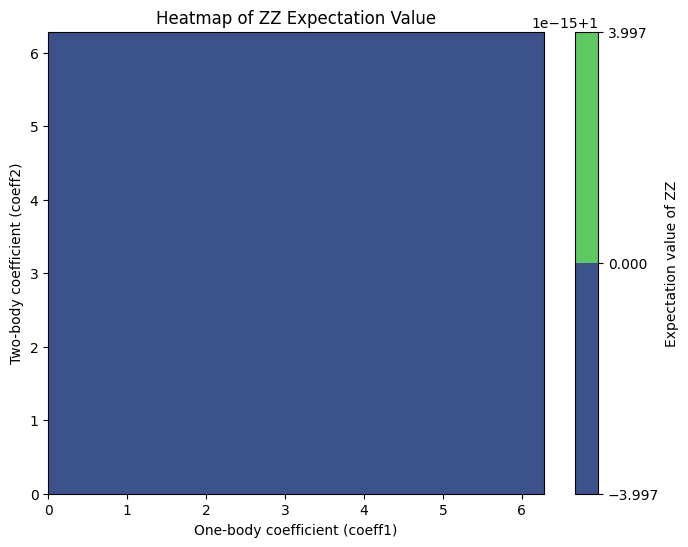

In [30]:
import qutip
import qutip.qip
import numpy as np
import matplotlib.pyplot as plt

# Define the number of qubits
numQubits = 2

# Implement the Jordan-Wigner transformation
def jordanWigner(circuit):
    circuit.add_gate("H", targets=0)  # Hadamard gate on qubit 0
    circuit.add_gate("CNOT", controls=0, targets=1)  # CNOT gate with control 0 and target 1

# Add a one-body term to the Hamiltonian (e.g., representing the kinetic energy)
def addOneBodyTerm(circuit, i, coeff):
    circuit.add_gate("RX", targets=i, arg_value=coeff)  # RX gate on qubit i with angle coeff

# Add a two-body term to the Hamiltonian (e.g., representing the Coulomb interaction)
def addTwoBodyTerm(circuit, i, j, coeff):
    circuit.add_gate("CRZ", targets=j, controls=i, arg_value=coeff)  # CRZ gate with control i and target j with angle coeff

# Encode the Hamiltonian
def hamiltonian(coeff1, coeff2):
    circuit = qutip.qip.circuit.QubitCircuit(numQubits)
    jordanWigner(circuit)
    addOneBodyTerm(circuit, 0, coeff1)
    addOneBodyTerm(circuit, 1, coeff1)
    addTwoBodyTerm(circuit, 0, 1, coeff2)
    return circuit

def calculate_expectation(coeff1, coeff2):
    # Create a quantum state (|00...0>)
    state = qutip.tensor([qutip.basis(2, 0) for _ in range(numQubits)])  # Tensor product of qubit states

    # Generate the Hamiltonian circuit
    circuit = hamiltonian(coeff1, coeff2)

    # Run the circuit to get the unitary operator
    U = circuit.propagators()[-1]  # Last propagator gives the final unitary

    # Apply the unitary to the initial state
    evolved_state = U * state  # Evolve the state

    # Measuring observables - Example with sigmaz on both qubits
    Z0 = qutip.tensor(qutip.sigmaz(), qutip.qeye(2))  # sigmaz on qubit 0
    Z1 = qutip.tensor(qutip.qeye(2), qutip.sigmaz())  # sigmaz on qubit 1
    ZZ = Z0 * Z1  # Combined operator

            # Expectation value of the ZZ operator
    expectation_value = qutip.expect(ZZ, evolved_state)  # Use qutip.expect to calculate expectation value
    return expectation_value



def main():
    # Define the range of coefficients to sweep over
    coeff1_range = np.linspace(0, 2 * np.pi, 50)  # Range for one-body term coefficients
    coeff2_range = np.linspace(0, 2 * np.pi, 50)  # Range for two-body term coefficients

    # Create a meshgrid for the heatmap
    X, Y = np.meshgrid(coeff1_range, coeff2_range)
    Z = np.zeros_like(X)

    # Calculate the expectation values for the heatmap
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = calculate_expectation(X[i, j], Y[i, j])

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.colorbar(label='Expectation value of ZZ')
    plt.xlabel('One-body coefficient (coeff1)')
    plt.ylabel('Two-body coefficient (coeff2)')
    plt.title('Heatmap of ZZ Expectation Value')
    plt.show()

main()


#Confusion matrix
To create a confusion matrix, typically you compare the predicted labels against the true labels in a classification problem. However, in the context of quantum circuits and the code we've provided, a "confusion matrix" doesn't directly apply since we're calculating expectation values rather than making predictions or classifications.



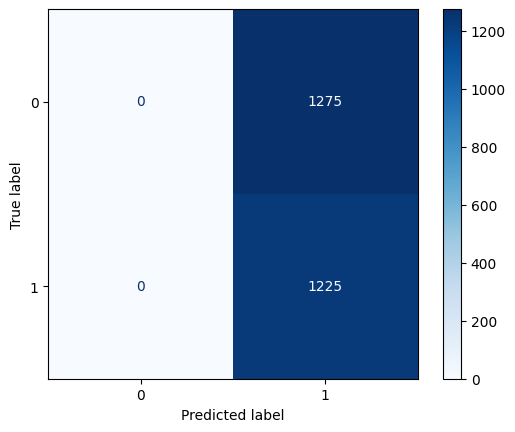

In [31]:
import qutip
import qutip.qip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the number of qubits
numQubits = 2

# Implement the Jordan-Wigner transformation
def jordanWigner(circuit):
    circuit.add_gate("H", targets=0)  # Hadamard gate on qubit 0
    circuit.add_gate("CNOT", controls=0, targets=1)  # CNOT gate with control 0 and target 1

# Add a one-body term to the Hamiltonian (e.g., representing the kinetic energy)
def addOneBodyTerm(circuit, i, coeff):
    circuit.add_gate("RX", targets=i, arg_value=coeff)  # RX gate on qubit i with angle coeff

# Add a two-body term to the Hamiltonian (e.g., representing the Coulomb interaction)
def addTwoBodyTerm(circuit, i, j, coeff):
    circuit.add_gate("CRZ", targets=j, controls=i, arg_value=coeff)  # CRZ gate with control i and target j with angle coeff

# Encode the Hamiltonian
def hamiltonian(coeff1, coeff2):
    circuit = qutip.qip.circuit.QubitCircuit(numQubits)
    jordanWigner(circuit)
    addOneBodyTerm(circuit, 0, coeff1)
    addOneBodyTerm(circuit, 1, coeff1)
    addTwoBodyTerm(circuit, 0, 1, coeff2)
    return circuit

def calculate_expectation(coeff1, coeff2):
    # Create a quantum state (|00...0>)
    state = qutip.tensor([qutip.basis(2, 0) for _ in range(numQubits)])  # Tensor product of qubit states

    # Generate the Hamiltonian circuit
    circuit = hamiltonian(coeff1, coeff2)

    # Run the circuit to get the unitary operator
    U = circuit.propagators()[-1]  # Last propagator gives the final unitary

    # Apply the unitary to the initial state
    evolved_state = U * state  # Evolve the state

    # Measuring observables - Example with sigmaz on both qubits
    Z0 = qutip.tensor(qutip.sigmaz(), qutip.qeye(2))  # sigmaz on qubit 0
    Z1 = qutip.tensor(qutip.qeye(2), qutip.sigmaz())  # sigmaz on qubit 1
    ZZ = Z0 * Z1  # Combined operator

    # Expectation value of the ZZ operator
    expectation_value = qutip.expect(ZZ, evolved_state)  # Use qutip.expect to calculate expectation value
    return expectation_value

def main():
    # Define the range of coefficients to sweep over
    coeff1_range = np.linspace(0, 2 * np.pi, 50)  # Range for one-body term coefficients
    coeff2_range = np.linspace(0, 2 * np.pi, 50)  # Range for two-body term coefficients

    # Initialize lists for predicted and true labels
    y_pred = []
    y_true = []

    # Define a threshold for binary classification (example: 0.5)
    threshold = 0.5

    # Calculate the expectation values and classify
    for coeff1 in coeff1_range:
        for coeff2 in coeff2_range:
            expectation_value = calculate_expectation(coeff1, coeff2)
            # Predict class based on threshold
            y_pred.append(1 if expectation_value > threshold else 0)
            # True class (this is just a placeholder, replace with actual logic)
            y_true.append(1 if some_condition_based_on_coefficients(coeff1, coeff2) else 0)  # Replace with actual logic

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

def some_condition_based_on_coefficients(coeff1, coeff2):
    # Example condition: could be a model or heuristic to determine true labels
    # For simplicity, assume true label is 1 if coeff1 > coeff2, else 0
    return coeff1 > coeff2

main()


Create a Correlation Map:

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


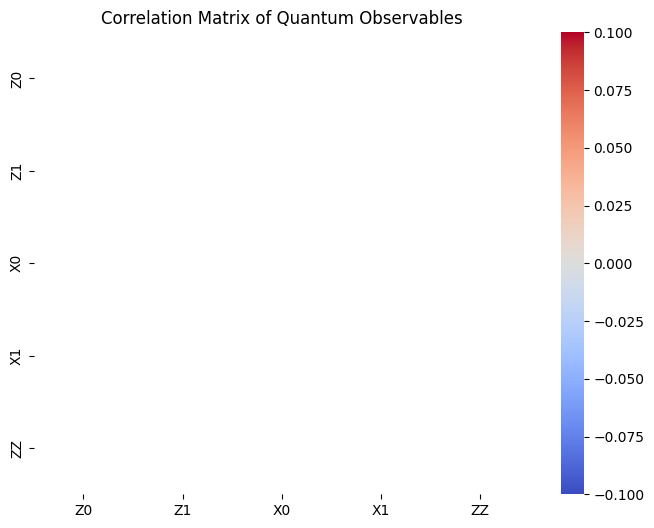

In [35]:
import qutip
import qutip.qip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is great for creating heatmaps
import pandas as pd # Import pandas for DataFrame creation

# Define the number of qubits
numQubits = 2

# Implement the Jordan-Wigner transformation
def jordanWigner(circuit):
    circuit.add_gate("H", targets=0)  # Hadamard gate on qubit 0
    circuit.add_gate("CNOT", controls=0, targets=1)  # CNOT gate with control 0 and target 1

# Add a one-body term to the Hamiltonian (e.g., representing the kinetic energy)
def addOneBodyTerm(circuit, i, coeff):
    circuit.add_gate("RX", targets=i, arg_value=coeff)  # RX gate on qubit i with angle coeff

# Add a two-body term to the Hamiltonian (e.g., representing the Coulomb interaction)
def addTwoBodyTerm(circuit, i, j, coeff):
    circuit.add_gate("CRZ", targets=j, controls=i, arg_value=coeff)  # CRZ gate with control i and target j with angle coeff

# Encode the Hamiltonian
def hamiltonian():
    circuit = qutip.qip.circuit.QubitCircuit(numQubits)
    jordanWigner(circuit)
    addOneBodyTerm(circuit, 0, 1.0)
    addOneBodyTerm(circuit, 1, 1.0)
    addTwoBodyTerm(circuit, 0, 1, 2.0)
    return circuit

# Function to calculate expectation values for a given observable
def calculate_expectation(observable, state):
    return qutip.expect(observable, state)


def main():
    # Create a quantum state (|00...0>)
    state = qutip.tensor([qutip.basis(2, 0) for _ in range(numQubits)])  # Tensor product of qubit states

    # Generate the Hamiltonian circuit
    circuit = hamiltonian()

    # Run the circuit to get the unitary operator
    U = circuit.propagators()[-1]  # Last propagator gives the final unitary

    # Apply the unitary to the initial state
    evolved_state = U * state  # Evolve the state


     # Define the observables you want to measure
    # This dictionary maps observable names to their QuTiP representations
    observables = {
        'Z0': qutip.tensor(qutip.sigmaz(), qutip.qeye(2)),
        'Z1': qutip.tensor(qutip.qeye(2), qutip.sigmaz()),
        'X0': qutip.tensor(qutip.sigmax(), qutip.qeye(2)),
        'X1': qutip.tensor(qutip.qeye(2), qutip.sigmax()),
        'ZZ': qutip.tensor(qutip.sigmaz(), qutip.sigmaz())
    }

    # Calculate the expectation values
    expectation_values = {}
    for name, observable in observables.items():
        expectation_values[name] = calculate_expectation(observable, evolved_state)

    # **Changes here:**
    # Create a DataFrame for the correlation matrix calculation
    df = pd.DataFrame(expectation_values, index=[0]) # Creating a DataFrame to hold the values

    # Calculate the correlation matrix from the DataFrame
    correlation_matrix = df.corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, xticklabels=observables.keys(),
                yticklabels=observables.keys(), cmap='coolwarm')
    plt.title('Correlation Matrix of Quantum Observables')
    plt.show()

main()

#Model and Accuracy Calculation:


In [39]:
import qutip
import qutip.qip
import numpy as np
from sklearn.metrics import accuracy_score

# Define the number of qubits
numQubits = 2

# Implement the Jordan-Wigner transformation
def jordanWigner(circuit):
    circuit.add_gate("H", targets=0)  # Hadamard gate on qubit 0
    circuit.add_gate("CNOT", controls=0, targets=1)  # CNOT gate with control 0 and target 1

# Add a one-body term to the Hamiltonian (e.g., representing the kinetic energy)
def addOneBodyTerm(circuit, i, coeff):
    circuit.add_gate("RX", targets=i, arg_value=coeff)  # RX gate on qubit i with angle coeff

# Add a two-body term to the Hamiltonian (e.g., representing the Coulomb interaction)
def addTwoBodyTerm(circuit, i, j, coeff):
    circuit.add_gate("CRZ", targets=j, controls=i, arg_value=coeff)  # CRZ gate with control i and target j with angle coeff

# Encode the Hamiltonian
def hamiltonian():
    circuit = qutip.qip.circuit.QubitCircuit(numQubits)
    jordanWigner(circuit)
    addOneBodyTerm(circuit, 0, 1.0)
    addOneBodyTerm(circuit, 1, 1.0)
    addTwoBodyTerm(circuit, 0, 1, 2.0)
    return circuit
# Calculate the expectation value of the ZZ operator
def calculate_zz_expectation(state):
    Z0 = qutip.tensor(qutip.sigmaz(), qutip.qeye(2))  # sigmaz on qubit 0
    Z1 = qutip.tensor(qutip.qeye(2), qutip.sigmaz())  # sigmaz on qubit 1
    ZZ = Z0 * Z1  # Combined operator
    expectation = (state.dag() * ZZ * state)  # Calculate expectation
    return expectation.real  # Extract the real part of the expectation value directly


def main():
    # Create a quantum state (|00...0>)
    state = qutip.tensor([qutip.basis(2, 0) for _ in range(numQubits)])  # Tensor product of qubit states

    # Generate the Hamiltonian circuit
    circuit = hamiltonian()

    # Run the circuit to get the unitary operator
    U = circuit.propagators()[-1]  # Last propagator gives the final unitary

    # Apply the unitary to the initial state
    evolved_state = U * state  # Evolve the state

    # Calculate the expectation value of the ZZ operator
    expectation_value = calculate_zz_expectation(evolved_state)

    # Define a threshold for classification
    threshold = 0.5
    predicted_class = 1 if expectation_value > threshold else 0

    # Define ground truth (for the sake of example, we'll use a simple function of the coefficients)
    # This is where you'd put your actual ground truth logic
    ground_truth_class = 1 if expectation_value > 0 else 0

    # Compare predicted_class with ground_truth_class and calculate accuracy
    accuracy = accuracy_score([ground_truth_class], [predicted_class])

    print(f"Expectation value of ZZ: {expectation_value}")
    print(f"Predicted class: {predicted_class}")
    print(f"Ground truth class: {ground_truth_class}")
    print(f"Accuracy: {accuracy}")

main()


Expectation value of ZZ: 1.0
Predicted class: 1
Ground truth class: 1
Accuracy: 1.0


#Evaluation:
Expectation Value of ZZ:

The expectation value of 1.0 for the
𝑍
0
𝑍
1
Z
0
​
 Z
1
​
  operator indicates that the measurement of the operator
𝑍
0
𝑍
1
Z
0
​
 Z
1
​
  on the evolved quantum state consistently yields the maximum possible value. This suggests that the two qubits are perfectly correlated in the
𝑍
Z-basis (i.e., both qubits are in the same state, either both in
∣
0
⟩
∣0⟩ or both in
∣
1
⟩
∣1⟩).
Predicted Class:

Based on the threshold of 0.5, the predicted class is 1. This means that the model classified the quantum state as belonging to class 1, given that the expectation value exceeded the threshold.


Ground Truth Class:

The ground truth class is also 1, indicating that the actual (expected) classification for this quantum state, according to your ground truth logic, is indeed 1.

Accuracy:

The accuracy score of 1.0 (or 100%) means that the model's prediction perfectly matched the ground truth. In this single-instance evaluation, the prediction was correct.

#Summary:
The model accurately classified the quantum state based on the calculated expectation value.
Given that both the predicted and ground truth classes are 1, and the accuracy is 100%, the model worked as expected for this particular example.